In [ ]:
using Pkg
Pkg.activate("../Project.toml")
Pkg.instantiate()

In [2]:
#45s
#using Distributed
using Dates
using Plots
using JLD2
using LsqFit, StatsBase
using QuadGK
using Parameters
using Distributions
using SpecialFunctions
using Random
using SparseArrays


include(joinpath(@__DIR__,"..","src","Parameter_Setting.jl"))
include(joinpath(@__DIR__,"..","src","Dynamics.jl"))
include(joinpath(@__DIR__,"..","src","reversal_learning.jl"))
include(joinpath(@__DIR__,"..","src","Babadi_Formula.jl"))
include(joinpath(@__DIR__,"..","src","Plot.jl"))
cent(X) = X .- mean(X,dims=1)
corr(X,N) = ((X' * X) / N) ./ sqrt.(diag(X'*X/N) * diag(X' * X/N)')
cov(X,N) = ((X' * X) / N)# ./ sqrt.(diag(X'*X/N) * diag(X' * X/N)')
palette_J = cgrad(:Blues,6,categorical=true)
palette_h = cgrad(:Oranges,6,categorical=true)

### Fig. S1
- Fig. S1B is in Fig-1.ipynb

In [3]:
#30s
#coordinate transform of correlation
tmp_correlation_ϕ(y,ρ,f) = (1/2π) * quadgk(x -> (ϕ(x - Tf(f)) - f)*(ϕ(ρ*x + sqrt(1-ρ^2)*y-Tf(f))-f) * exp(-(x^2+y^2)/2), -5,5)[1]
correlation_ϕ(ρ,f) =  quadgk(y -> tmp_correlation_ϕ(y,ρ,f), -5,5)[1]/(f*(1-f))

ϕ(x) = x > 0 ? 1 : 0
p.f = 0.1
x_corr = 0.01:0.01:1
y_corr = correlation_ϕ.(x_corr,p.f);


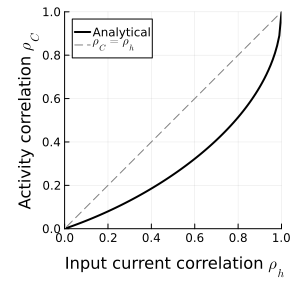

In [4]:
plot(x_corr,y_corr,color="black",linewidth = 2,label="Analytical")
#plot!(xcorr,corr_trans.(xcorr,p.corr_fit),color="black",linewidth = 2,linestyle=:dashdot,label = "Approximation")
plot!(x_corr,x_corr,linestyle=:dash,color="gray",label="\$\\rho_{C}=\\rho_{h}\$")
xcorr = 0.01:0.01:1.0

plot!(
    label=0.1,
    xlim = (0,1),
    ylim = (0,1),
    xticks = 0:0.2:1,
    yticks = 0:0.2:1,
    xlabel = "\n Input current correlation \$\\rho_{h}\$",
    ylabel = "Activity correlation \$\\rho_{C}\$",
    size = (300,300),
    aspect_ratio = 1.0,
    legend = true
    )
savefig("../figure/corr_hC.pdf")
plot!()

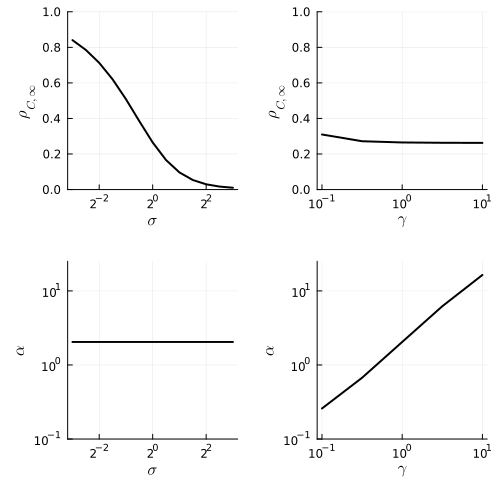

In [ ]:


tdata = 0:0.1:30
#tdata = 0:0.1:10
exp_func(t,para) = (1-para[1]) * exp.(-para[2] * t) .+ para[1]
function fitting(p,tdata)
    m(t,para) = exp_func(t,para)
    p0 = [1.,1.]
    ρdata = [ρC(t,0,p,1) for t in tdata]
    fit = curve_fit(m,tdata,ρdata,p0)
    return fit.param,ρdata
end

p.γh = 1.; p.γJ = 1.
σlist = [2^x for x in -3.:0.5:3.]

param_list = zeros(length(σlist),2)
for i_σ in 1:length(σlist)
    p.σh = σlist[i_σ]; p.σJ = 0.
    param_list[i_σ,:],_ = fitting(p,tdata)
end
#plot!(size = (400,300),xlabel = "Time",ylabel = "Activity correlation \$\\rho_{C}\$")
#savefig("figure/autocor_exponential_fit.pdf")
plot(σlist, param_list[:,1],xscale = :log2,ylim = (0,1),color="black",linewidth = 2)
p1 = plot!(size = (300,300),xlabel = "\$\\sigma\$",ylabel = "\$\\rho_{C,\\infty} \$",legend=false)
plot(σlist, param_list[:,2],xscale = :log2,color="black",linewidth = 2)
p2 = plot!(size = (300,300),xlabel = "\$\\sigma\$",yscale = :log10,ylabel = "\$\\alpha\$",legend=false,ylim = (10^-1,10^1.4))
pA = plot(p1,p2,size = (300,600),layout=(2,1))

tdata = 0:0.1:30
γlist = [10^x for x in -1.:0.5:1.]

param_list = zeros(length(γlist),2)
p.σh = 2^0.; p.σJ = 0.
for i_γ in 1:length(γlist)
    p.γh = γlist[i_γ];
    param_list[i_γ,:],_  = fitting(p,tdata)
end
#plot!(size = (400,300),xlabel = "Time",ylabel = "Activity correlation \$\\rho_{C}\$")
#savefig("figure/autocor_exponential_fit.pdf")
plot(γlist, param_list[:,1],xscale = :log10,ylim = (0,1),color="black",linewidth = 2)
p1 = plot!(size = (300,300),xlabel = "\$\\gamma\$",ylabel = "\$\\rho_{C,\\infty} \$",legend=false)
plot(γlist, param_list[:,2],xscale = :log10,yscale=:log10,color="black",linewidth = 2)
p2 = plot!(size = (300,300),xlabel = "\$\\gamma\$",ylabel = "\$\\alpha\$",legend=false,ylim = (10^-1,10^1.4))
pB = plot(p1,p2,size = (300,600),layout = (2,1))

plot(pA,pB,size = (500,500))
savefig("figure/autocor_fitted_parameters.pdf")
plot!()

[0.5125458037569327, 2.1133624522766863]
[0.2711155981340691, 2.1133624522847514]
[0.10405304857903137, 2.1133624522779755]


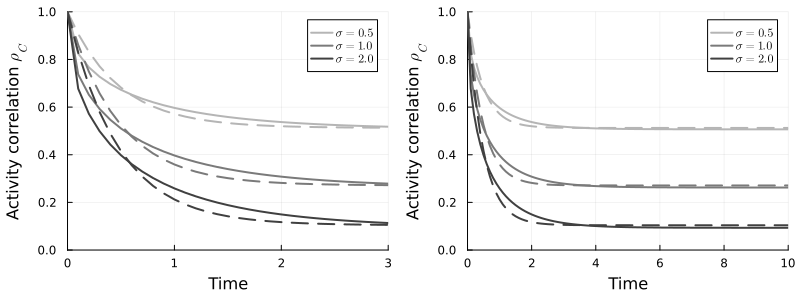

In [6]:


tdata = 0:0.1:10
exp_func(t,para) = (1-para[1]) * exp.(-para[2] * t) .+ para[1]
function fitting(p,tdata)
    m(t,para) = exp_func(t,para)
    p0 = [1.,1.]
    ρdata = [ρC(t,0,p,1) for t in tdata]
    fit = curve_fit(m,tdata,ρdata,p0)
    return fit.param,ρdata
end

p.γh = 1.; p.γJ = 1.
σlist = [2^x for x in -1:1:1.]
plot()
palette_grey = cgrad(:Greys,6,categorical=true)
for i_σ in 1:length(σlist)
    p.σh = σlist[i_σ]; p.σJ = 0.
    param,ρdata = fitting(p,tdata)
    plot!(tdata,exp_func(tdata,param),linewidth = 2,ylim = (0,1),linestyle = :dash,color=palette_grey[i_σ + 2],label="")
    plot!(tdata,ρdata,linewidth = 2,color = palette_grey[i_σ + 2],label = "\$\\sigma = $(σlist[i_σ])\$")
    println(param)
end
p1 = plot!(size = (400,300),xlim = (0,3),xlabel = "Time",ylabel = "Activity correlation \$\\rho_{C}\$")
savefig("../figure/autocor_exponential_fit_0-3.pdf")
p2 = plot(p1,size = (400,300),xlim = (0,10),xlabel = "Time",ylabel = "Activity correlation \$\\rho_{C}\$")
savefig("../figure/autocor_exponential_fit_0-10.pdf")
plot!(p1,p2,size=(800,300),leftmargin= 5Plots.mm,bottommargin = 5Plots.mm,)

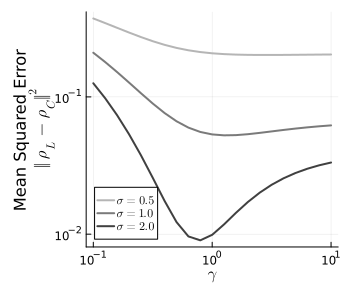

In [7]:
σlist = [2^x for x in -1:1:1.]
plot()
p.r = 0.5

for i_σ in 1:length(σlist)
    p.σh = σlist[i_σ]; p.σJ = 0.
    t_end = 10; t_step = 0.01
    γlist = [10^x for x in -1:0.1:1.]
    error_list = zeros(length(γlist))
    for i_γ in 1:length(γlist)
        p.γh = γlist[i_γ]; p.γJ = γlist[i_γ]
        error_list[i_γ] = sum([(ρL(t,0,p,1) - ρC(t,0,p,1))^2 for t in 0:t_step:t_end])/length(0:t_step:t_end)
    end
    plot!(γlist,error_list,label = "\$\\sigma=$(σlist[i_σ])\$",color = palette_grey[i_σ+2],linewidth = 2)#,ylim = (0.0,0.1))
    #plot!(2*ones(2),[0.,0.2],xscale = :log10)
end
plot!(
    size = (350,300),
    ylabel = "Mean Squared Error\n \$\\Vert\\rho_{L}-\\rho_{C}\\Vert^{2}\$",
    xlabel = "\$\\gamma\$",
    xscale = :log10,
    yscale = :log10,
    legend=:bottomleft)
    savefig("../figure/autocor_error_LC.pdf")
    plot!()